In [30]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense,Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

print(tf.__version__)

2.2.0


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    # fig.canvas.draw()
    plt.show()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [5]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
a = []
while True:
  a.append(' ' * 10**6)

## Architecture 1 with 2X2 Kernel size and 2 hidden layers##

In [67]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


# from __future__ import print_function
# import keras
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten


batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)             

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.3861 - accuracy: 0.8798 - val_loss: 0.0817 - val_accuracy: 0.9754
Epoch 2/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1429 - accuracy: 0.9572 - val_loss: 0.0553 - val_accuracy: 0.9828
Epoch 3/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1102 - accuracy: 0.9661 - val_loss: 0.0428 - val_accuracy: 0.9855
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0924 - accuracy: 0.9716 - val_loss: 0.0410 - val_accuracy: 0.9863
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0825 - accuracy: 0.9739 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0765 - accuracy: 0.9758 - val_loss: 0.0343 - val_accuracy: 0.9885
Epoch 7/50
60000/60000 [==============================] - 2s 36us/st

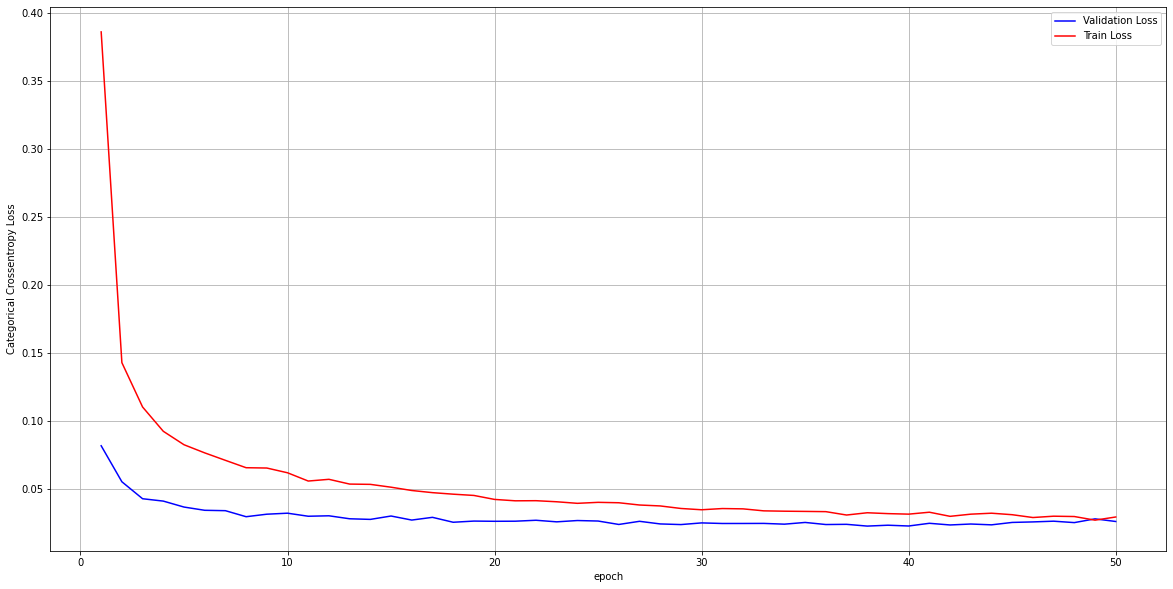

In [68]:
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

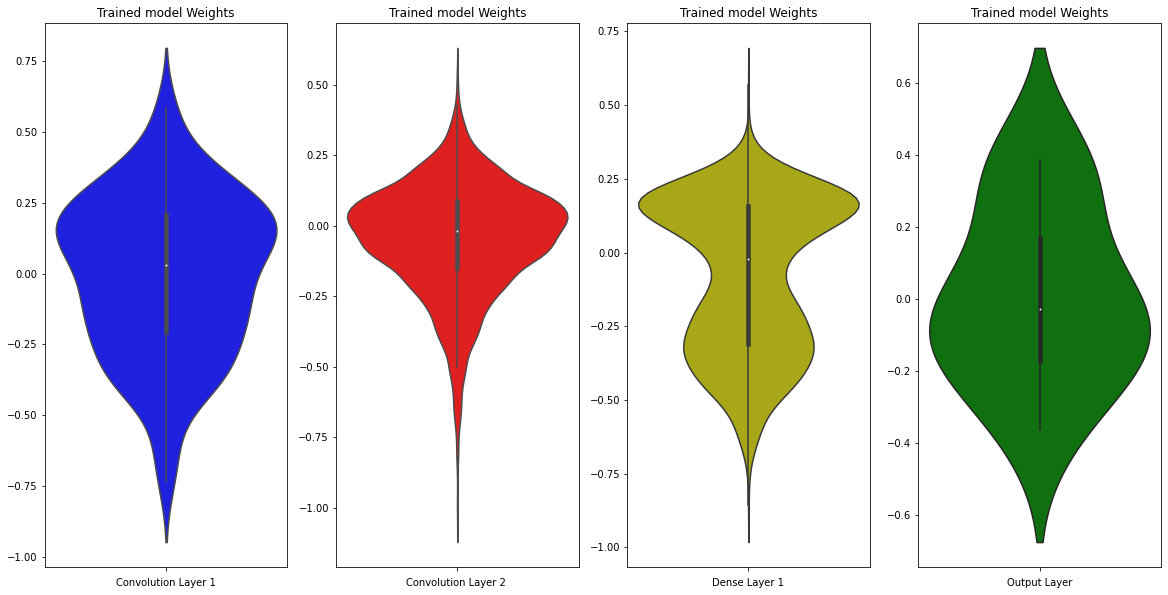

In [71]:
w_after = model.get_weights()

c1_w = w_after[0].flatten().reshape(-1,1)
c2_w = w_after[2].flatten().reshape(-1,1)
d1_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[7].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=d1_w,color='y')
plt.xlabel('Dense Layer 1')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('Output Layer')
plt.show()

##Architecture 2 with 3 convolution layers and 3X3 kernels##

In [34]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(192, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 192)       

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.6572 - accuracy: 0.7826 - val_loss: 0.1154 - val_accuracy: 0.9653
Epoch 2/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.2144 - accuracy: 0.9363 - val_loss: 0.0749 - val_accuracy: 0.9765
Epoch 3/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1659 - accuracy: 0.9511 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 4/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1399 - accuracy: 0.9582 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1256 - accuracy: 0.9632 - val_loss: 0.0535 - val_accuracy: 0.9845
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1139 - accuracy: 0.9662 - val_loss: 0.0448 - val_accuracy: 0.9864
Epoch 7/50
60000/60000 [==============================] - 3s 56us/st

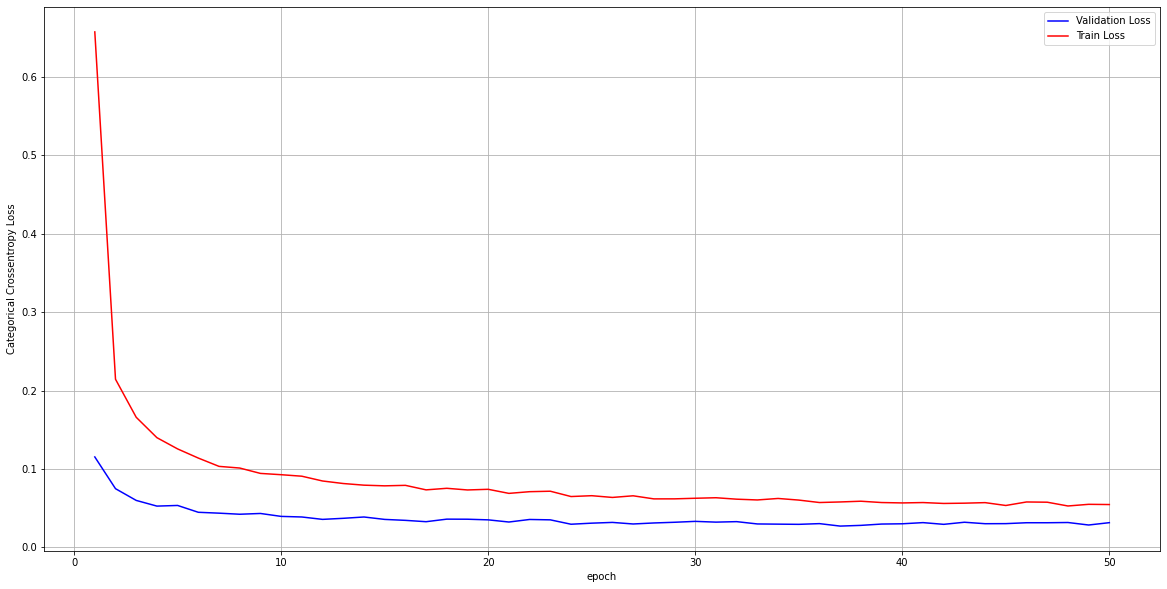

In [35]:
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

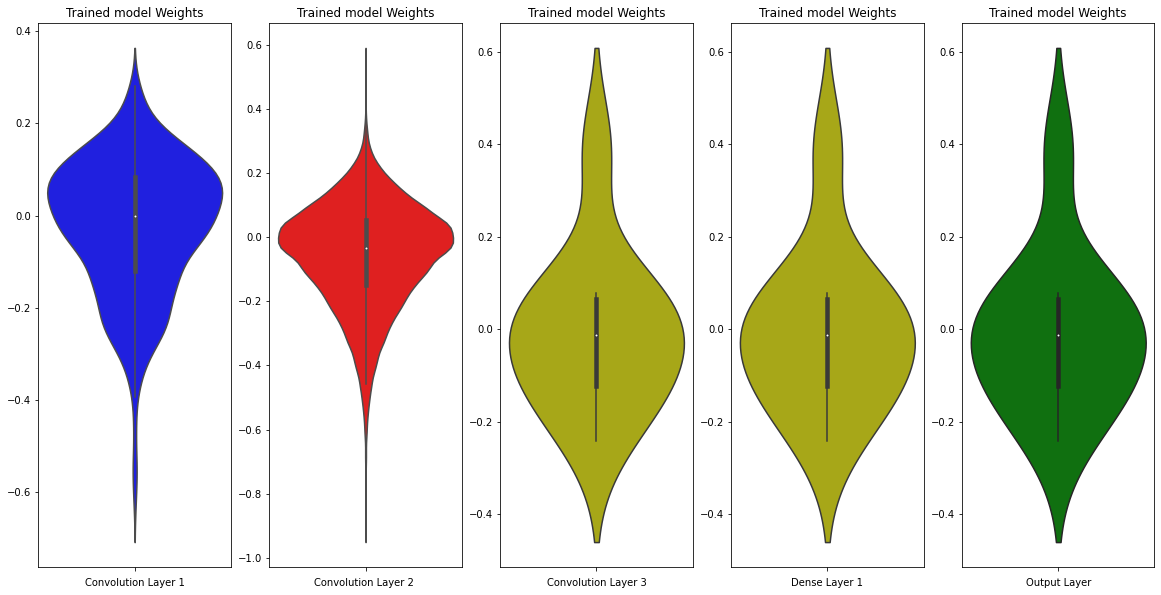

In [41]:
w_after = model.get_weights()

c1_w = w_after[0].flatten().reshape(-1,1)
c2_w = w_after[2].flatten().reshape(-1,1)
c3_w = w_after[4].flatten().reshape(-1,1)
d1_w = w_after[6].flatten().reshape(-1,1)
o_w = w_after[9].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Convolution Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Dense Layer 1')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('Output Layer')
plt.show()

##Architecture 3 with 4 convolution layers and 4X4 kernels(with Batch norm)##

In [54]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

#avoid max pool 2,2 in initial layers as we get negative dimension in later layers
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(56, (3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(224, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(310, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.094, seed=None)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 56)        64568     
_________________________________________________________________
dropout_74 (Dropout)         (None, 11, 11, 56)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 9, 9, 128)         64640     
_________________________________________________________________
dropout_75 (Dropout)         (None, 9, 9, 128)       

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.5459 - accuracy: 0.8261 - val_loss: 0.3926 - val_accuracy: 0.8790
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1243 - accuracy: 0.9622 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 3/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0895 - accuracy: 0.9721 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 4/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0732 - accuracy: 0.9777 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 5/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0627 - accuracy: 0.9803 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0262 - val_accuracy: 0.9921
Epoch 7/50
60000/60000 [==============================] - 6s 98us/s

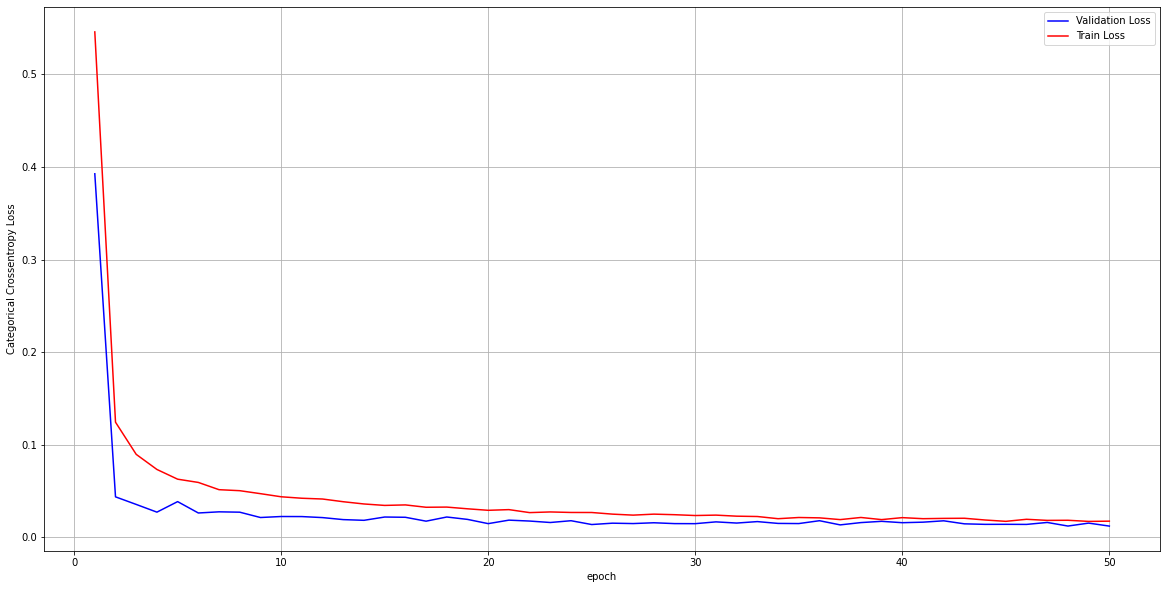

In [55]:
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

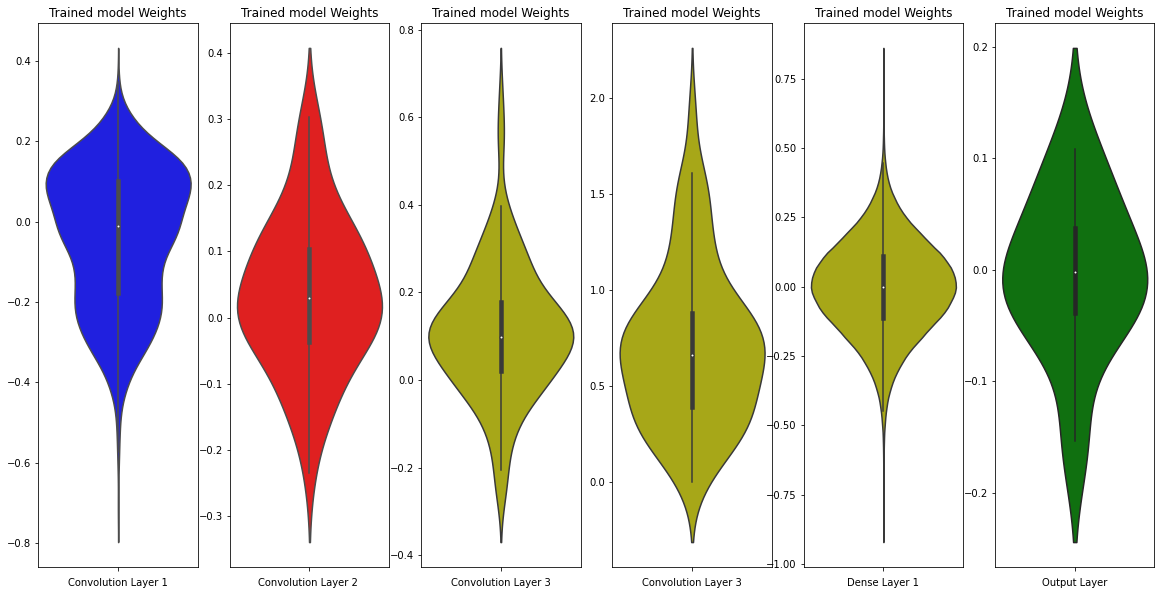

In [60]:
w_after = model.get_weights()

c1_w = w_after[0].flatten().reshape(-1,1)
c2_w = w_after[3].flatten().reshape(-1,1)
c3_w = w_after[5].flatten().reshape(-1,1)
c4_w = w_after[8].flatten().reshape(-1,1)
d1_w = w_after[16].flatten().reshape(-1,1)
o_w = w_after[23].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c3_w,color='y')
plt.xlabel('Convolution Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c4_w,color='y')
plt.xlabel('Convolution Layer 3')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=d1_w,color='y')
plt.xlabel('Dense Layer 1')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=o_w,color='g')
plt.xlabel('Output Layer')
plt.show()

##Architecture 4 with 5 convolution layers and 5X5 kernels(with Batch norm)##

In [61]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

#avoid max pool 2,2 in initial layers as we get negative dimension in later layers
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(156, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(224, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(296, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(310, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.094, seed=None)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
dropout_78 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
dropout_79 (Dropout)         (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 19, 19, 156)       319644    
_________________________________________________________________
dropout_80 (Dropout)         (None, 19, 19, 156)       0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 19, 19, 156)     

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.3907 - accuracy: 0.8759 - val_loss: 0.2336 - val_accuracy: 0.9341
Epoch 2/50
60000/60000 [==============================] - 19s 316us/step - loss: 0.0964 - accuracy: 0.9705 - val_loss: 0.0435 - val_accuracy: 0.9859
Epoch 3/50
60000/60000 [==============================] - 19s 317us/step - loss: 0.0705 - accuracy: 0.9793 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 4/50
60000/60000 [==============================] - 19s 317us/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0293 - val_accuracy: 0.9903
Epoch 5/50
60000/60000 [==============================] - 19s 316us/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0219 - val_accuracy: 0.9930
Epoch 6/50
60000/60000 [==============================] - 19s 317us/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0249 - val_accuracy: 0.9924
Epoch 7/50
60000/60000 [==============================] 

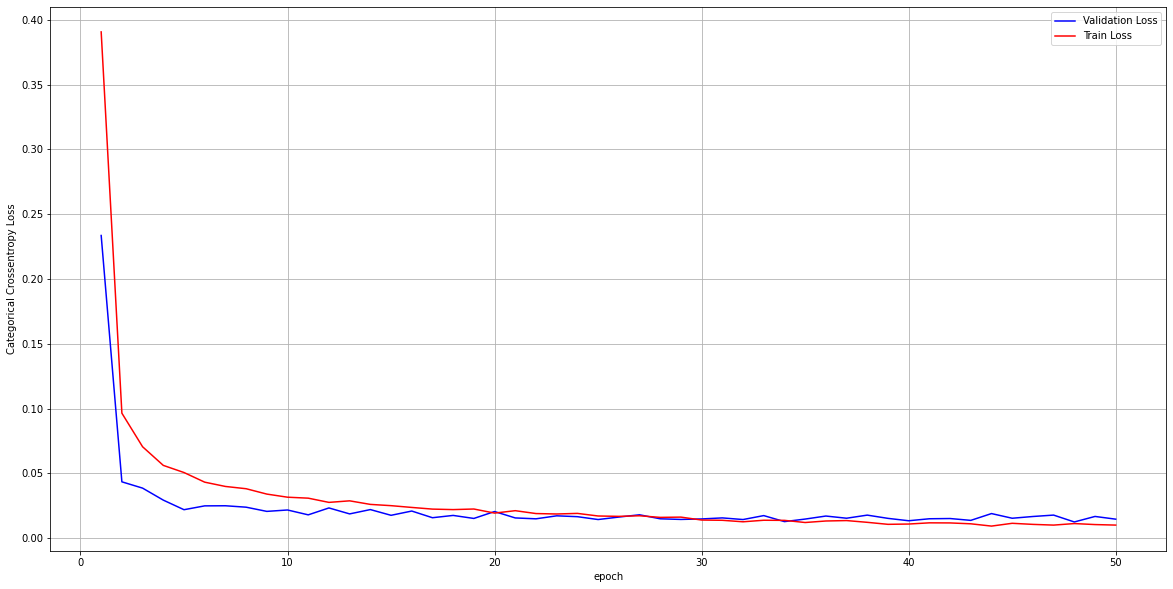

In [62]:
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

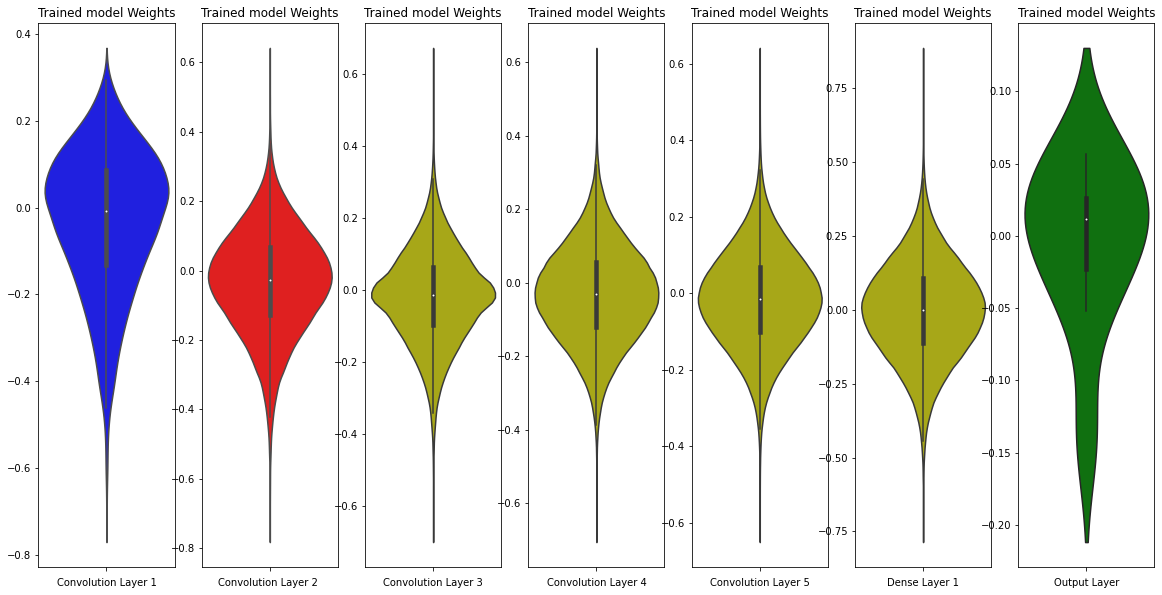

In [66]:
w_after = model.get_weights()

c1_w = w_after[0].flatten().reshape(-1,1)
c2_w = w_after[2].flatten().reshape(-1,1)
c3_w = w_after[4].flatten().reshape(-1,1)
c4_w = w_after[10].flatten().reshape(-1,1)
c5_w = w_after[16].flatten().reshape(-1,1)
d1_w = w_after[22].flatten().reshape(-1,1)
o_w = w_after[29].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 7, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 7, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 7, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c3_w,color='y')
plt.xlabel('Convolution Layer 3')

plt.subplot(1, 7, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c4_w,color='y')
plt.xlabel('Convolution Layer 4')

plt.subplot(1, 7, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=c5_w,color='y')
plt.xlabel('Convolution Layer 5')

plt.subplot(1, 7, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=d1_w,color='y')
plt.xlabel('Dense Layer 1')

plt.subplot(1, 7, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=o_w,color='g')
plt.xlabel('Output Layer')
plt.show()

#CONCLUSION: #
  1. CNN was performed on the MNIST dataset using various architectures.
  2. The train and test errors were plotted for the same.
  3. It was found that CNNs outperform MLP by a good margin.
  4. Deeper layers tended to perform better than 2/3 layer networks but also valition loss increased moving from 4 go 5 layer CNN.
  5. For deeper CNNs Max pooling had to be avoided in intermediate layers because, it shrunk the size of output and led to dimension error when kernel size was large. 

In [73]:
from prettytable import PrettyTable
x = PrettyTable(["Number of Convolution Layers", "Validation Accuracy","kernel size", "Maxpooling", "Dropout" ])
x.add_row([2,99.21,'2X2',2,3 ])
x.add_row([3,99.16,'3X3',3,4 ])
x.add_row([4,99.55,'4X4',2,5 ])
x.add_row([5,99.60,'5X5',2,6 ])

print(x)


+------------------------------+---------------------+-------------+------------+---------+
| Number of Convolution Layers | Validation Accuracy | kernel size | Maxpooling | Dropout |
+------------------------------+---------------------+-------------+------------+---------+
|              2               |        99.21        |     2X2     |     2      |    3    |
|              3               |        99.16        |     3X3     |     3      |    4    |
|              4               |        99.55        |     4X4     |     2      |    5    |
|              5               |         99.6        |     5X5     |     2      |    6    |
+------------------------------+---------------------+-------------+------------+---------+
